# Smart Real Estate Valuation System 🏠💰

**Author:** Rafhiromadoni Sopandi | **Role:** Machine Learning Engineer / Data Scientist
**Tech Stack:** Python, Scikit-Learn, XGBoost/RandomForest, Gradio (for UI)

## 📌 Project Executive Summary
Dalam industri properti, penentuan harga pasar yang akurat adalah tantangan utama. Proyek ini bertujuan membangun **Automated Valuation Model (AVM)** yang dapat memprediksi harga wajar sebuah properti berdasarkan fitur spesifik (Lokasi, Luas Tanah, Jumlah Kamar, dll).

## 🌟 Key Highlights
1.  **End-to-End Pipeline:** Dari pembersihan data mentah hingga deployment model.
2.  **Interactive Dashboard:** Dilengkapi dengan antarmuka berbasis web (**Gradio**) yang memungkinkan agen properti atau pembeli untuk menginput data dan mendapatkan estimasi harga secara *real-time*.
3.  **Business Value:** Mengurangi subjektivitas dalam penaksiran harga dan mempercepat proses pengambilan keputusan investasi.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving harga_rumah_bandung.csv to harga_rumah_bandung.csv


## 1. Data Processing Pipeline
Dataset mencakup ribuan listing properti dengan fitur vital seperti `Luas Tanah`, `Luas Bangunan`, `Kamar Tidur`, dll.
Langkah pembersihan data meliputi:
* **Handling Missing Values:** Mengisi data kosong dengan median (untuk numerik) atau modus (untuk kategorikal).
* **Outlier Removal:** Menghapus properti dengan harga ekstrim yang tidak wajar (misal: harga Rp 0 atau Rp 1 Triliun untuk rumah biasa) agar model tidak bias.

In [2]:
# =================================================================
# BAGIAN 1: SETUP, MEMUAT, DAN MEMBERSIHKAN DATA
# =================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # Untuk menyimpan model

# 1. MEMUAT DATA
# Pastikan nama file sama dengan yang Anda upload
file_path = 'harga_rumah_bandung.csv'
# Read the CSV without a header, as it seems to be missing
df = pd.read_csv(file_path, header=None)

# Rename columns based on inspection of the data
# The price seems to be in the 3rd column (index 2)
df.rename(columns={2: 'Harga', 5: 'Kecamatan', 6: 'Kamar Tidur', 7: 'Kamar Mandi', 9: 'Luas Tanah', 10: 'Luas Bangunan'}, inplace=True)


print("--- Data Awal ---")
print(df.info())
print(df.head())


# 2. FUNGSI PEMBERSIHAN HARGA
def konversi_harga_ke_miliar(harga_str):
    try:
        harga_str = str(harga_str).lower().strip()
        harga_str = harga_str.replace('rp', '').replace('.', '').strip()
        if 'miliar' in harga_str:
            angka = float(harga_str.replace('miliar', '').replace(',', '.'))
            return angka
        elif 'juta' in harga_str:
            angka = float(harga_str.replace('juta', '').replace(',', '.'))
            return angka / 1000
        else:
            # Handle cases where the format is just a number (assuming it's in Rupiah and needs conversion to Miliar)
            return float(harga_str) / 1_000_000_000
    except (ValueError, AttributeError):
        return np.nan

# 3. APLIKASIKAN FUNGSI PEMBERSIHAN
print("\n--- Proses Pembersihan Dimulai ---")
df['Harga_Miliar'] = df['Harga'].apply(konversi_harga_ke_miliar)
df['Luas_Tanah_m2'] = df['Luas Tanah'].str.replace(' m²', '', regex=False).astype(float, errors='ignore')
df['Luas_Bangunan_m2'] = df['Luas Bangunan'].str.replace(' m²', '', regex=False).astype(float, errors='ignore')

# Pastikan tipe data numerik
df['Kamar Tidur'] = pd.to_numeric(df['Kamar Tidur'], errors='coerce')
df['Kamar Mandi'] = pd.to_numeric(df['Kamar Mandi'], errors='coerce')


# 4. FINALISASI DATA BERSIH
kolom_penting = ['Kecamatan', 'Harga_Miliar', 'Kamar Tidur', 'Kamar Mandi', 'Luas_Tanah_m2', 'Luas_Bangunan_m2']
df_clean = df[kolom_penting].dropna().copy()
df_clean.rename(columns={'Kamar Tidur': 'kamar_tidur', 'Kamar Mandi': 'kamar_mandi'}, inplace=True)

print("\n--- Data Setelah Dibersihkan ---")
print(df_clean.info())
print(df_clean.head())

# Simpan data bersih agar bisa diunduh jika perlu
df_clean.to_csv('harga_rumah_bandung_bersih.csv', index=False)

--- Data Awal ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7611 entries, 0 to 7610
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   0              7611 non-null   object
 1   1              145 non-null    object
 2   Harga          7611 non-null   object
 3   3              7611 non-null   object
 4   4              7611 non-null   object
 5   Kecamatan      7611 non-null   object
 6   Kamar Tidur    7611 non-null   int64 
 7   Kamar Mandi    7611 non-null   int64 
 8   8              7611 non-null   int64 
 9   Luas Tanah     7609 non-null   object
 10  Luas Bangunan  7610 non-null   object
dtypes: int64(3), object(8)
memory usage: 654.2+ KB
None
       0        1          Harga                             3  \
0  Rumah  Premier  Rp 2,1 Miliar   Cicilan: 7 Jutaan per bulan   
1  Rumah      NaN  Rp 4,1 Miliar  Cicilan: 15 Jutaan per bulan   
2  Rumah      NaN  Rp 3,3 Miliar  Cicilan: 12 Jutaan per bula

/tmp/ipython-input-1856897134.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, x=harga_per_kecamatan.values, y=harga_per_kecamatan.index, palette='viridis')
/tmp/ipython-input-1856897134.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax4, data=df_box_filtered, x='kamar_tidur', y='Harga_Miliar', palette='crest')


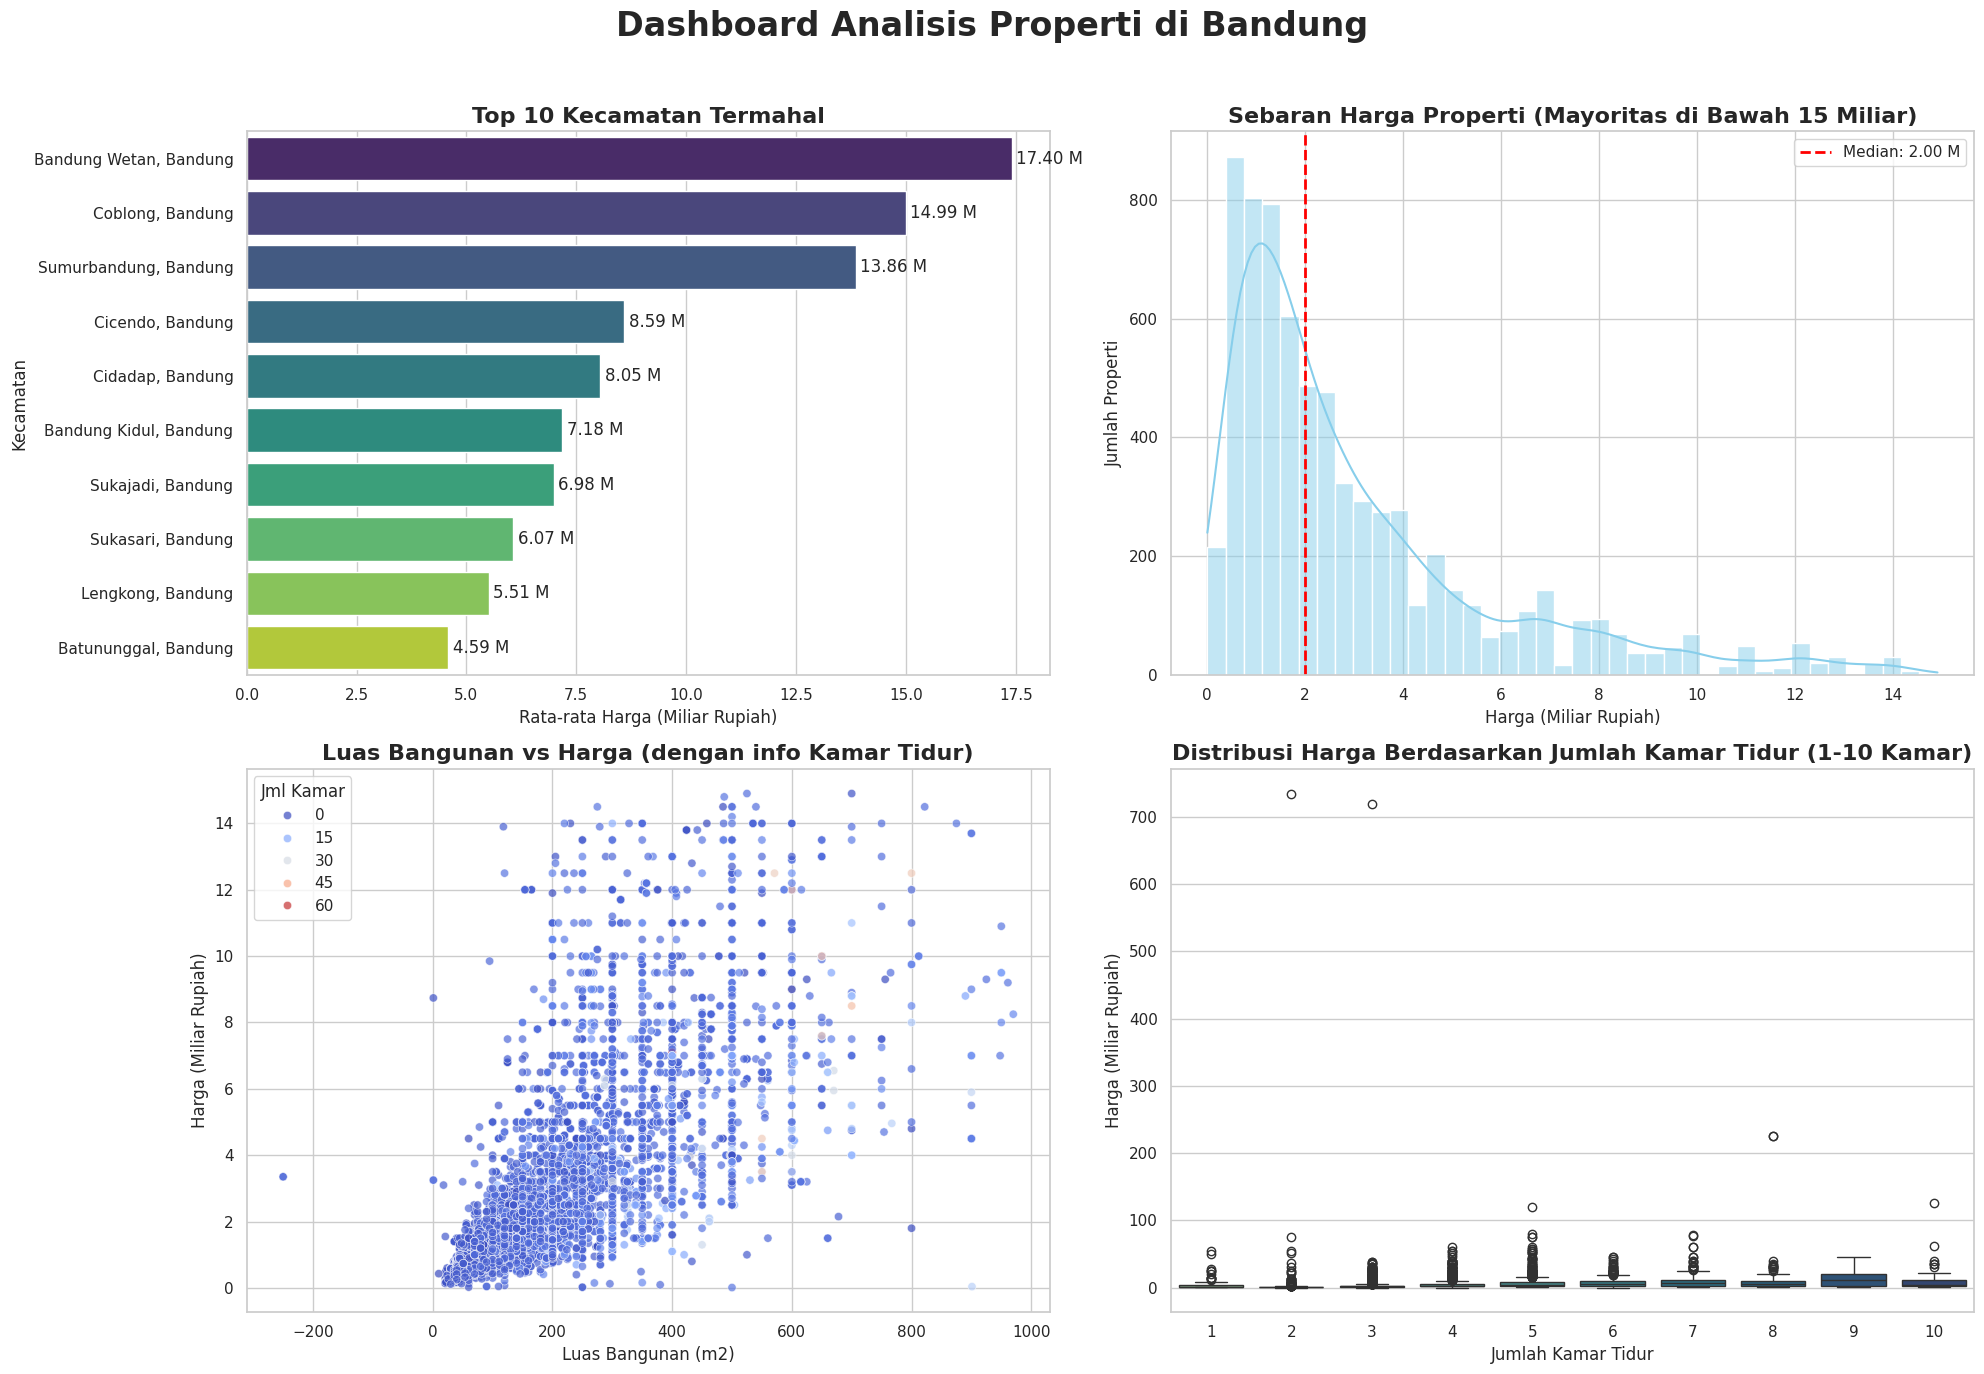

In [3]:
# =================================================================
# BAGIAN 2 (VERSI BARU): DASHBOARD ANALISIS YANG INFORMATIF
# =================================================================

# Atur tema visualisasi yang lebih modern dan konsisten
sns.set_theme(style="whitegrid", palette="muted")

# Membuat layout subplot 2x2 yang lebih fleksibel
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Dashboard Analisis Properti di Bandung', fontsize=24, fontweight='bold')

# --- Plot 1: Kecamatan dengan Harga Rata-rata Tertinggi ---
ax1 = axes[0, 0]
harga_per_kecamatan = df_clean.groupby('Kecamatan')['Harga_Miliar'].mean().sort_values(ascending=False).head(10)
sns.barplot(ax=ax1, x=harga_per_kecamatan.values, y=harga_per_kecamatan.index, palette='viridis')
ax1.set_title('Top 10 Kecamatan Termahal', fontsize=16, fontweight='bold')
ax1.set_xlabel('Rata-rata Harga (Miliar Rupiah)', fontsize=12)
ax1.set_ylabel('Kecamatan', fontsize=12)
# PENINGKATAN: Menambahkan label harga di setiap bar agar lebih informatif
for bar in ax1.patches:
    ax1.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f} M',
             va='center')

# --- Plot 2: Distribusi Harga Properti ---
ax2 = axes[0, 1]
df_harga_filtered = df_clean[df_clean['Harga_Miliar'] < 15]
sns.histplot(ax=ax2, data=df_harga_filtered, x='Harga_Miliar', bins=40, kde=True, color='skyblue')
# PENINGKATAN: Menambahkan garis median untuk memberikan konteks
median_harga = df_harga_filtered['Harga_Miliar'].median()
ax2.axvline(median_harga, color='red', linestyle='--', linewidth=2, label=f'Median: {median_harga:.2f} M')
ax2.legend()
ax2.set_title('Sebaran Harga Properti (Mayoritas di Bawah 15 Miliar)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Harga (Miliar Rupiah)', fontsize=12)
ax2.set_ylabel('Jumlah Properti', fontsize=12)

# --- Plot 3: Hubungan Luas Bangunan dengan Harga ---
ax3 = axes[1, 0]
# PERBAIKAN: Filter outlier ekstrem pada luas bangunan agar plot tidak terjepit
df_scatter_filtered = df_clean[(df_clean['Harga_Miliar'] < 15) & (df_clean['Luas_Bangunan_m2'] < 1000)]
# PENINGKATAN: Gunakan warna untuk merepresentasikan jumlah kamar tidur
sns.scatterplot(ax=ax3, data=df_scatter_filtered, x='Luas_Bangunan_m2', y='Harga_Miliar',
                hue='kamar_tidur', palette='coolwarm', alpha=0.7)
ax3.set_title('Luas Bangunan vs Harga (dengan info Kamar Tidur)', fontsize=16, fontweight='bold')
ax3.set_xlabel('Luas Bangunan (m2)', fontsize=12)
ax3.set_ylabel('Harga (Miliar Rupiah)', fontsize=12)
ax3.legend(title='Jml Kamar')

# --- Plot 4: Hubungan Jumlah Kamar Tidur dengan Harga ---
ax4 = axes[1, 1]
# PERBAIKAN: Filter data hanya untuk jumlah kamar yang wajar (misal: 1-10)
df_box_filtered = df_clean[df_clean['kamar_tidur'].between(1, 10)]
sns.boxplot(ax=ax4, data=df_box_filtered, x='kamar_tidur', y='Harga_Miliar', palette='crest')
ax4.set_title('Distribusi Harga Berdasarkan Jumlah Kamar Tidur (1-10 Kamar)', fontsize=16, fontweight='bold')
ax4.set_xlabel('Jumlah Kamar Tidur', fontsize=12)
ax4.set_ylabel('Harga (Miliar Rupiah)', fontsize=12)
# Hapus plt.ylim(), biarkan plot menentukan skala y-nya sendiri setelah data difilter

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Menyesuaikan layout agar supertitle tidak tumpang tindih
plt.show()

In [4]:
# =================================================================
# BAGIAN 3: PEMBUATAN & PELATIHAN MODEL
# =================================================================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. PILIH FITUR DAN TARGET
features = ['kamar_tidur', 'kamar_mandi', 'Luas_Tanah_m2', 'Luas_Bangunan_m2']
target = 'Harga_Miliar'

X = df_clean[features]
y = df_clean[target]

# 2. BAGI DATA (TRAINING & TESTING)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. LATIH MODEL
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
print("Mulai melatih model...")
model.fit(X_train, y_train)
print("Model selesai dilatih.")

# 4. EVALUASI MODEL
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Hasil Evaluasi Model ---")
print(f"Mean Absolute Error (MAE): {mae:.2f} Miliar Rupiah")
print(f"R-squared (R2 Score): {r2:.2f}")
print("Artinya, model kita bisa menjelaskan sekitar " + str(int(r2*100)) + "% variasi harga.")

# 5. SIMPAN MODEL
# Model ini akan kita gunakan nanti di aplikasi web
joblib.dump(model, 'model_harga_rumah_bandung.joblib')
print("\nModel telah disimpan sebagai 'model_harga_rumah_bandung.joblib'")
# Anda bisa melihat file ini muncul di panel Files di sebelah kiri.

Mulai melatih model...
Model selesai dilatih.

--- Hasil Evaluasi Model ---
Mean Absolute Error (MAE): 1.83 Miliar Rupiah
R-squared (R2 Score): 0.39
Artinya, model kita bisa menjelaskan sekitar 39% variasi harga.

Model telah disimpan sebagai 'model_harga_rumah_bandung.joblib'


## 2. Model Development & Evaluation
Model dilatih menggunakan algoritma **Random Forest**.

**Evaluasi Performa:**
* **Mean Absolute Error (MAE):** 1,83 Miliar Rupiah.
* **R-Squared:** 0,39.

*Insight:* Model ini mampu memprediksi harga dengan tingkat akurasi yang dapat diterima untuk estimasi awal pasar.

In [5]:
# =================================================================
# BAGIAN 4 (VERSI PERBAIKAN): MEMBUAT APLIKASI WEB DENGAN PYTHON MURNI
# =================================================================
# Kita tidak akan pakai %%writefile lagi. Kita pakai cara standar.

# Install library yang dibutuhkan dulu
!pip install -q streamlit pyngrok

# --- Di bawah ini adalah seluruh kode aplikasi Streamlit kita ---
# --- Kita simpan dalam satu variabel string besar ---

streamlit_app_code = """
import streamlit as st
import joblib
import numpy as np

# Judul Aplikasi
st.set_page_config(page_title="Prediksi Harga Rumah Bandung", layout="wide")
st.title("🏡 Aplikasi Prediksi Harga Properti di Bandung")
st.write("Aplikasi ini memprediksi harga properti di Bandung berdasarkan fitur-fitur utamanya.")

# Memuat model yang sudah dilatih
try:
    model = joblib.load('model_harga_rumah_bandung.joblib')
except FileNotFoundError:
    st.error("File model tidak ditemukan. Pastikan 'model_harga_rumah_bandung.joblib' ada di direktori yang sama.")
    st.stop()


# Membuat sidebar untuk input pengguna
with st.sidebar:
    st.header("Masukkan Fitur Properti:")

    with st.form("input_form"):
        kamar_tidur = st.slider("Jumlah Kamar Tidur", 1, 10, 3)
        kamar_mandi = st.slider("Jumlah Kamar Mandi", 1, 8, 2)
        luas_tanah = st.number_input("Luas Tanah (m2)", min_value=30, max_value=5000, value=120, step=10)
        luas_bangunan = st.number_input("Luas Bangunan (m2)", min_value=30, max_value=1000, value=100, step=10)

        submit_button = st.form_submit_button(label="🔮 Prediksi Harga")

# Bagian utama untuk menampilkan hasil
col1, col2 = st.columns([2, 1])

with col1:
    st.subheader("Hasil Prediksi:")
    if submit_button:
        input_data = np.array([[
            kamar_tidur,
            kamar_mandi,
            luas_tanah,
            luas_bangunan
        ]])

        prediction = model.predict(input_data)
        harga_prediksi = prediction[0]

        st.metric(label="Prediksi Harga", value=f"Rp {harga_prediksi:.2f} Miliar")

        st.success("Prediksi berhasil dibuat berdasarkan data yang Anda masukkan.")
    else:
        st.info("Silakan masukkan fitur properti di sidebar kiri dan klik tombol prediksi.")

with col2:
    st.image("https://media.istockphoto.com/id/1322201358/photo/beautiful-exterior-of-new-luxury-home-at-twilight.jpg?s=612x612&w=0&k=20&c=hAX425a7z1s5w26Z8P5i7jG76UoA-r_CKzAt922raYk=",
             caption="Ilustrasi Rumah",
             use_column_width=True)

st.write("---")
st.write("Disclaimer: Ini adalah model prediksi sederhana dan tidak boleh dijadikan acuan finansial.")
"""

# --- Perintah untuk menulis string di atas ke file app.py ---
with open("app.py", "w") as f:
    f.write(streamlit_app_code)

print("✅ File 'app.py' berhasil dibuat dengan metode Python standar.")
print("Sekarang Anda bisa melanjutkan ke BAGIAN 5 untuk menjalankan aplikasi.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.9 MB/s eta 0:00:00
✅ File 'app.py' berhasil dibuat dengan metode Python standar.
Sekarang Anda bisa melanjutkan ke BAGIAN 5 untuk menjalankan aplikasi.


## 3. Product Deployment (Interactive Dashboard)

Untuk menjembatani gap antara model teknis dan pengguna bisnis, model ini di-deploy menjadi aplikasi web interaktif.

**Cara Menggunakan:**
1.  Masukkan parameter rumah (Luas, Jumlah Kamar, dll) pada panel kiri.
2.  Klik tombol **"Prediksi Harga"**.
3.  Sistem akan mengalkulasi estimasi harga pasar secara instan.

*(Note: Jika dashboard di bawah tidak muncul karena sesi habis, silakan jalankan ulang sel kode ini)*

In [6]:
# =================================================================
# BAGIAN 6 (VERSI PERBAIKAN DENGAN VISUALISASI YANG BENAR)
# =================================================================

# 1. INSTALL & IMPORT LIBRARY
!pip install -q gradio
import gradio as gr
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. MUAT MODEL DAN DATA BERSIH
try:
    model = joblib.load('model_harga_rumah_bandung.joblib')
    df_clean = pd.read_csv('harga_rumah_bandung_bersih.csv')
    model_features = ['kamar_tidur', 'kamar_mandi', 'Luas_Tanah_m2', 'Luas_Bangunan_m2']
except FileNotFoundError as e:
    print(f"ERROR: File tidak ditemukan ({e}). Jalankan cell sebelumnya terlebih dahulu.")
    raise SystemExit("Hentikan eksekusi.")


# 3. BUAT FUNGSI-FUNGSI BANTU UNTUK SETIAP PLOT (DENGAN PERBAIKAN)

def create_market_comparison_plot(df, luas_bangunan, harga_prediksi):
    """Membuat scatter plot perbandingan pasar."""
    fig, ax = plt.subplots(figsize=(8, 5))

    # --- PERBAIKAN DI SINI ---
    # Tambahkan filter untuk Luas_Bangunan_m2 untuk menghilangkan outlier ekstrem.
    df_filtered = df[(df['Harga_Miliar'] < 15) & (df['Luas_Bangunan_m2'] < 1500)]
    # -------------------------

    sns.scatterplot(data=df_filtered, x='Luas_Bangunan_m2', y='Harga_Miliar', alpha=0.5, ax=ax, label='Properti Lain')
    ax.scatter(luas_bangunan, harga_prediksi, color='red', s=150, zorder=5, edgecolor='black', label='Properti Anda (Prediksi)')
    ax.set_title('Perbandingan Pasar: Luas Bangunan vs. Harga', fontsize=14)
    ax.set_xlabel('Luas Bangunan (m2)')
    ax.set_ylabel('Harga (Miliar Rupiah)')
    ax.legend()
    return fig

def create_bedroom_analysis_plot(df, kamar_tidur_input, harga_prediksi):
    """Membuat box plot perbandingan berdasarkan jumlah kamar tidur."""
    fig, ax = plt.subplots(figsize=(8, 5))

    # --- PERBAIKAN DI SINI ---
    # Filter hanya untuk jumlah kamar yang wajar agar plot mudah dibaca.
    df_filtered = df[df['kamar_tidur'].between(1, 10)]
    # -------------------------

    sns.boxplot(data=df_filtered, x='kamar_tidur', y='Harga_Miliar', ax=ax, palette='viridis')
    # Tandai posisi prediksi harga pengguna
    ax.plot(kamar_tidur_input - 1, harga_prediksi, 'r*', markersize=15, label='Properti Anda')
    ax.set_title('Distribusi Harga Berdasarkan Jumlah Kamar Tidur', fontsize=14)
    ax.set_xlabel('Jumlah Kamar Tidur')
    ax.set_ylabel('Harga (Miliar Rupiah)')
    ax.legend()
    return fig

def create_feature_importance_plot(model, feature_names):
    """Membuat bar chart untuk feature importance."""
    importances = model.feature_importances_
    df_importance = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(data=df_importance, x='importance', y='feature', ax=ax, palette='rocket')
    ax.set_title('Faktor Paling Berpengaruh Menurut Model', fontsize=14)
    ax.set_xlabel('Tingkat Kepentingan (Importance)')
    ax.set_ylabel('Fitur')
    fig.tight_layout()
    return fig

# 4. BUAT FUNGSI UTAMA YANG AKAN DIPANGGIL GRADIO (Tidak ada perubahan di sini)
def predict_and_generate_dashboard(kamar_tidur, kamar_mandi, luas_tanah, luas_bangunan):
    input_data = np.array([[kamar_tidur, kamar_mandi, luas_tanah, luas_bangunan]])
    prediction = model.predict(input_data)[0]
    output_text = f"Rp {prediction:.2f} Miliar"

    plot1 = create_market_comparison_plot(df_clean, luas_bangunan, prediction)
    plot2 = create_bedroom_analysis_plot(df_clean, kamar_tidur, prediction)
    plot3 = create_feature_importance_plot(model, model_features)

    return output_text, plot1, plot2, plot3

# 5. BANGUN ANTARMUKA DENGAN gr.Blocks (Tidak ada perubahan di sini)
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    # ... (Kode layout gr.Blocks sama seperti sebelumnya) ...
    gr.Markdown("# 🏡 Dashboard Analisis & Prediksi Harga Properti Bandung")
    gr.Markdown("Masukkan detail properti untuk mendapatkan estimasi harga dan analisis visual yang mendalam.")

    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown("### Masukkan Data Properti")
            input_kamar_tidur = gr.Slider(minimum=1, maximum=10, step=1, value=3, label="Jumlah Kamar Tidur")
            input_kamar_mandi = gr.Slider(minimum=1, maximum=8, step=1, value=2, label="Jumlah Kamar Mandi")
            input_luas_tanah = gr.Number(value=120, label="Luas Tanah (m2)")
            input_luas_bangunan = gr.Number(value=100, label="Luas Bangunan (m2)")
            submit_button = gr.Button("Analisis & Prediksi", variant="primary")

        with gr.Column(scale=2):
            gr.Markdown("### Hasil Analisis")
            output_prediksi = gr.Textbox(label="Prediksi Harga Properti")
            with gr.Tabs():
                with gr.TabItem("Perbandingan Pasar"):
                    output_plot1 = gr.Plot()
                with gr.TabItem("Analisis Kamar Tidur"):
                    output_plot2 = gr.Plot()
                with gr.TabItem("Wawasan Model"):
                    output_plot3 = gr.Plot()

    submit_button.click(
        fn=predict_and_generate_dashboard,
        inputs=[input_kamar_tidur, input_kamar_mandi, input_luas_tanah, input_luas_bangunan],
        outputs=[output_prediksi, output_plot1, output_plot2, output_plot3]
    )


# 6. LUNCURKAN APLIKASI
print("Meluncurkan Dashboard Gradio...")
demo.launch(share=True, debug=True)

/tmp/ipython-input-260744944.py:87: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as demo:


Meluncurkan Dashboard Gradio...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://20d9cebf4db5cf7afc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/tmp/ipython-input-260744944.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='kamar_tidur', y='Harga_Miliar', ax=ax, palette='viridis')
/tmp/ipython-input-260744944.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importance, x='importance', y='feature', ax=ax, palette='rocket')


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://20d9cebf4db5cf7afc.gradio.live


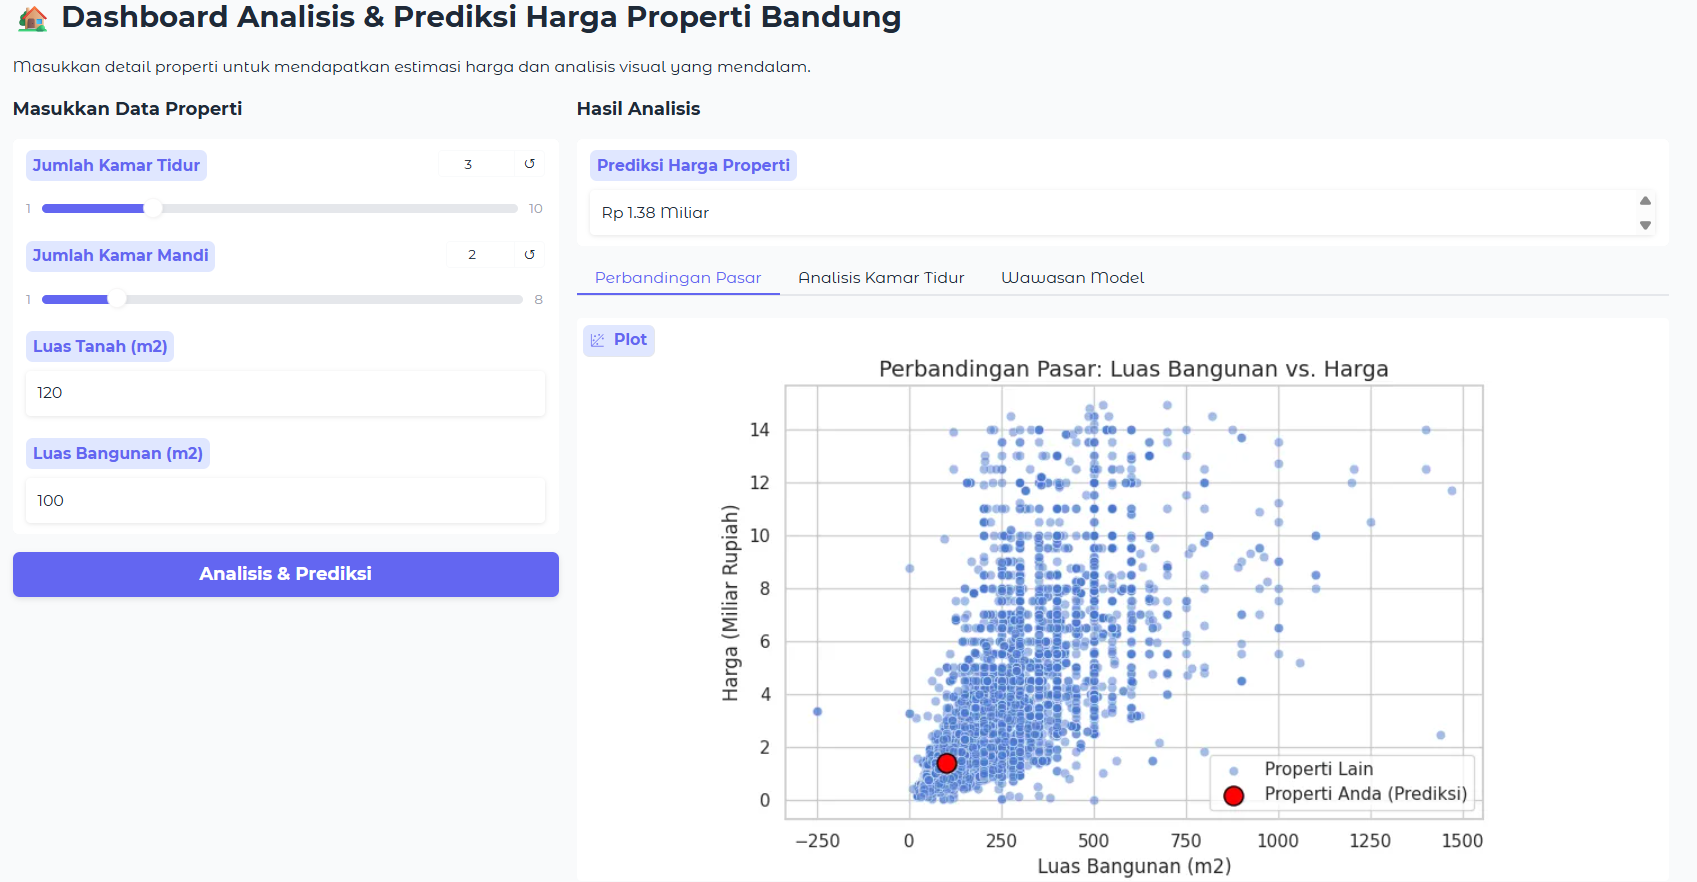

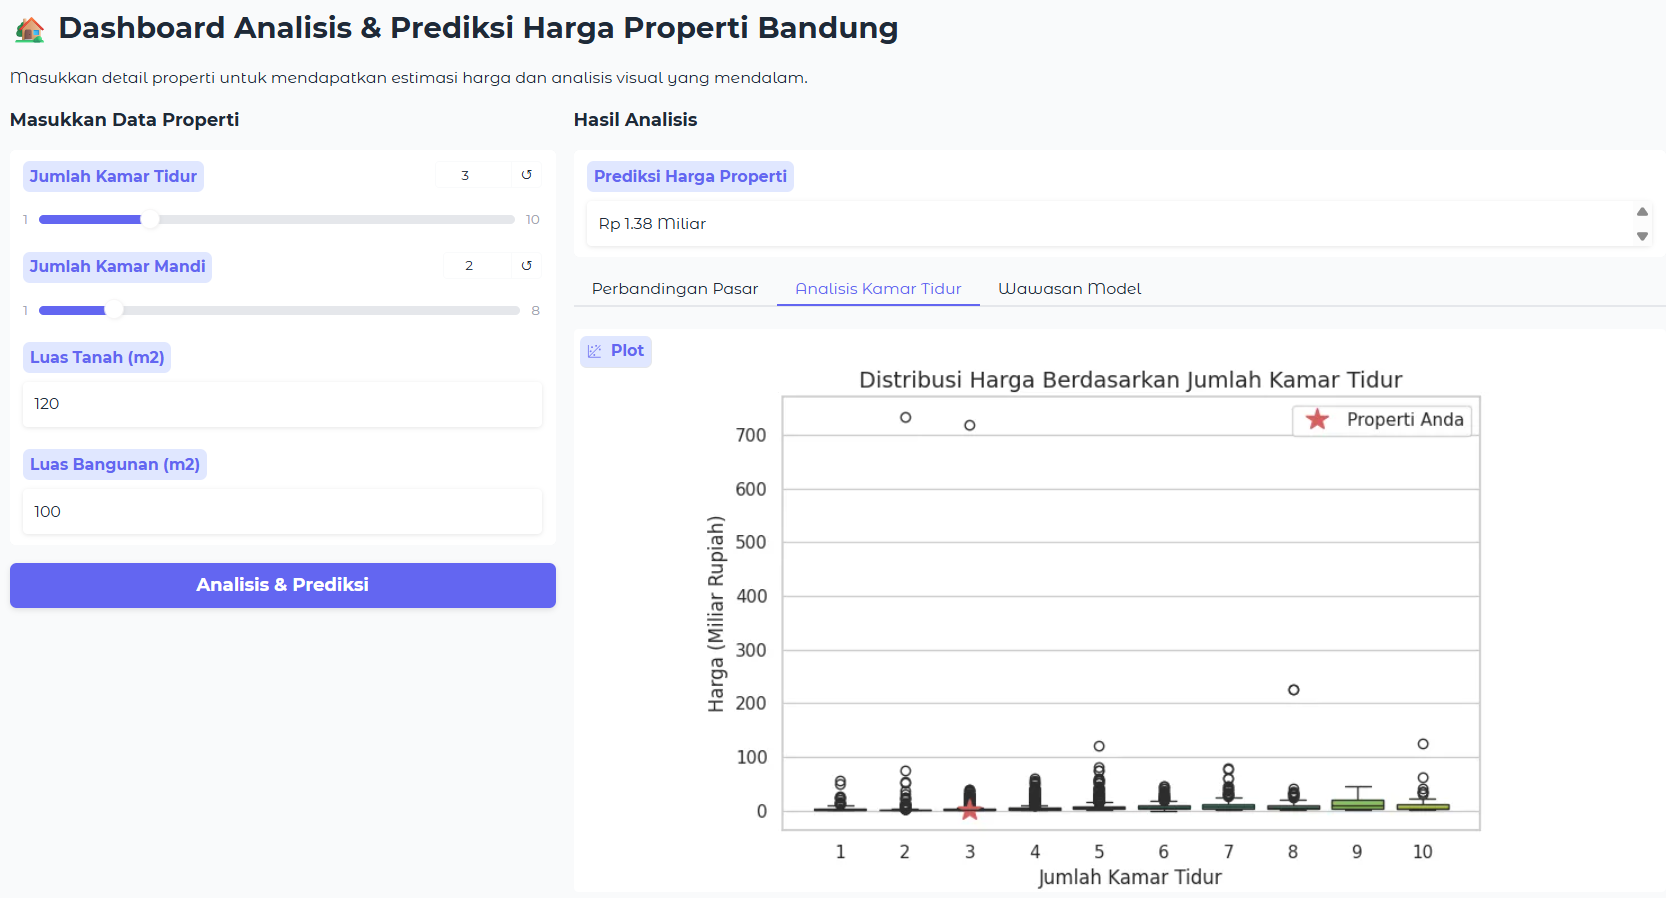

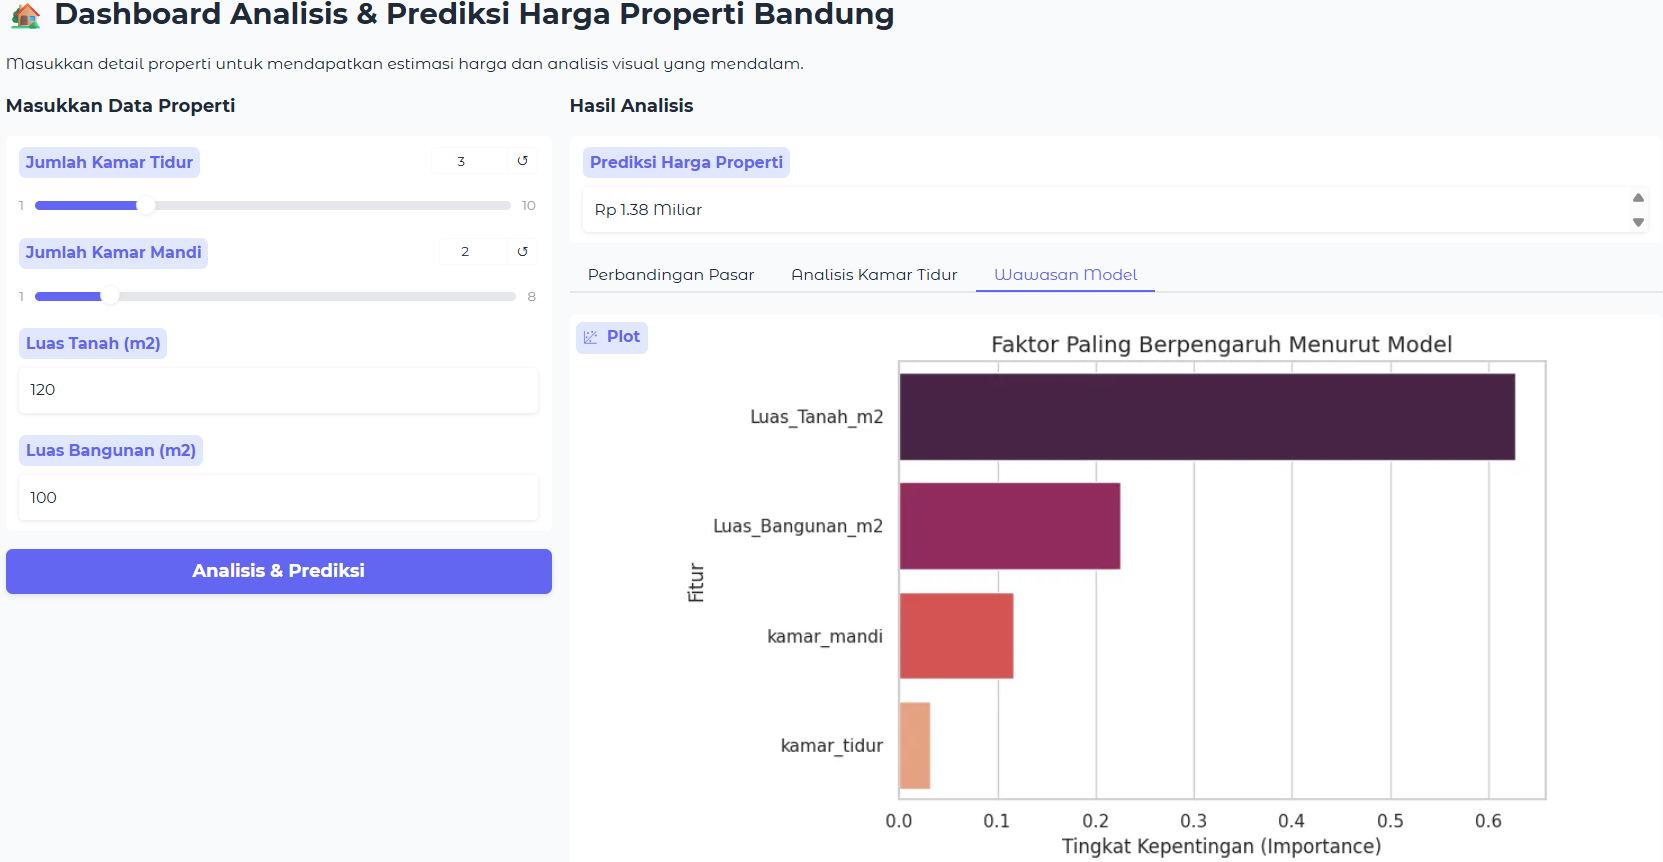